# CS210 - Term Project
- Beyza Balota
- 31232


- I tried to get some self-awareness with this project.  I decide to use the step count, sleep, and menstrual cycle data from my Apple Health account. I wanted to know if my sleeping patterns or level of activity affected my cycle. I was unable to identify any significant correlations between them. However, because my data set is so small I intend to conduct additional research after gathering years' worth of data.

# Step 1: Data Cleaning
- My health data included many other data that I wont even need like heart rate, energy burned, walking speed, etc.
- So, I started with cleaning them and extracting the data I need which are: step count, sleep count and period data.
- Below code extracts the data and saves the data into .csv files into my computer as new files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import xml.etree.ElementTree as ET
import csv
from datetime import datetime

# Load and parse the XML file
tree = ET.parse('/Users/beyzabalota/Desktop/cs210Project/apple_health_export/export.xml')
root = tree.getroot()

# Function to parse and format the date
def parse_date(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S %z")

# Lists to store cleaned data
sleep_data = []
step_data = []
#menstrual_data = []

# Iterate through records in the XML file
for record in root.findall('Record'):
    record_type = record.get('type')
    if record_type == 'HKCategoryTypeIdentifierSleepAnalysis' and record.get('value') == 'HKCategoryValueSleepAnalysisInBed':
        sleep_data.append({
            'start_date': parse_date(record.get('startDate')),
            'end_date': parse_date(record.get('endDate'))
        })
    elif record_type == 'HKQuantityTypeIdentifierStepCount':
        step_data.append({
            'start_date': parse_date(record.get('startDate')),
            'end_date': parse_date(record.get('endDate')),
            'steps': int(record.get('value'))
        })

# Save the cleaned data to CSV files
with open('sleep_data.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['start_date', 'end_date'])
    writer.writeheader()
    writer.writerows(sleep_data)

with open('step_data.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['start_date', 'end_date', 'steps'])
    writer.writeheader()
    writer.writerows(step_data)

print("Data cleaning complete. Files saved as sleep_data.csv, step_data.csv, and menstrual_data.csv")



Data cleaning complete. Files saved as sleep_data.csv, step_data.csv, and menstrual_data.csv


# Step 2: Reading and Displaying

- Reading the .csv files that cleaned above and displaying average sleep and step count per day for monthly basis.
- The total steps and total sleep hours columns shows the average daily count of that month


In [3]:
import pandas as pd

# Function to calculate total sleep time in hours
def total_sleep_time(row):
    return (row['end_date'] - row['start_date']).total_seconds() / 3600

# Read the sleep data
sleep_df = pd.read_csv('sleep_data.csv')
sleep_df['start_date'] = pd.to_datetime(sleep_df['start_date']).dt.tz_localize(None)  # Convert to timezone-naive
sleep_df['end_date'] = pd.to_datetime(sleep_df['end_date']).dt.tz_localize(None)      # Convert to timezone-naive
sleep_df['total_sleep_hours'] = sleep_df.apply(total_sleep_time, axis=1)

# Aggregate sleep data by month
sleep_df.set_index('start_date', inplace=True)
monthly_sleep = sleep_df.resample('M')['total_sleep_hours'].sum()

# Read the step data
step_df = pd.read_csv('step_data.csv')
step_df['start_date'] = pd.to_datetime(step_df['start_date']).dt.tz_localize(None)  # Convert to timezone-naive

# Aggregate step data by month
step_df.set_index('start_date', inplace=True)
monthly_steps = step_df.resample('M')['steps'].sum()

# Combine monthly sleep, step, and menstrual day data into a single DataFrame
monthly_summary = pd.DataFrame({
    'Total Sleep Hours': (monthly_sleep / 30).round(2),
    'Total Steps': (monthly_steps / 30).round(2)
}).fillna(0)

# Modify the 'start_date' column to display only the year and month
monthly_summary.index = monthly_summary.index.strftime('%Y-%m')


# Load the menstrual data from the CSV file
menstrual_data_df = pd.read_csv('/Users/beyzabalota/Desktop/beyza_balota_CS210_Project/menstrual_data.csv')


menstrual_data_df['start_date'] = pd.to_datetime(menstrual_data_df['start_date']).dt.strftime('%Y-%m')
# Merge the menstrual data into the existing DataFrame

monthly_summary = monthly_summary.merge(menstrual_data_df[['start_date', 'cycle']], on='start_date', how='left')
# Display the updated DataFrame with the new 'cycle' column

# Rename 'start_date' column to 'date'
monthly_summary.rename(columns={'start_date': 'date'}, inplace=True)

# Display the DataFrame to confirm the change
display(monthly_summary)




,date,Total Sleep Hours,Total Steps,cycle
0,2019-05,0.00,2010.57,NaN
1,2019-06,0.00,3843.20,NaN
2,2019-07,0.00,14306.17,NaN
3,2019-08,0.00,7398.90,NaN
4,2019-09,0.20,3205.73,NaN
5,2019-10,0.00,3959.90,NaN
6,2019-11,0.00,4072.43,NaN
7,2019-12,0.00,3987.07,NaN
8,2020-01,0.00,7432.93,NaN
9,2020-02,0.00,3490.17,NaN


# Step 3: Understanding and Preprocessing

- Displaying the info about the dataframe
- Filling the Nan values for my cycle and 0 values for the sleep data
- Here, I realized that I have wrong data for sleep calculations in few months. My average sleep was coming less than 2 hours per day.
- So I decided to fill these values with the mean of my sleep, which I believe would be best for the errored data after my researches.
- Unfortunately, this filling method have also some bad impact such as less variance.

In [4]:


# Displaying information about the DataFrame
display(monthly_summary.info())

# Fill NaN values with the most common value for 'cycle' column
most_common_value = monthly_summary['cycle'].mode()[0] if not monthly_summary['cycle'].mode().empty else 0
monthly_summary['cycle'].fillna(most_common_value, inplace=True)

# Convert 'cycle' column to integer
monthly_summary['cycle'] = monthly_summary['cycle'].astype(int)

# Calculate the mean of the 'Total Sleep Hours' for values greater than 2
valid_sleep_data_mean = monthly_summary[monthly_summary['Total Sleep Hours'] > 2]['Total Sleep Hours'].mean()

# Replace values less than or equal to 2 with this mean and round to two decimal places
monthly_summary.loc[monthly_summary['Total Sleep Hours'] <= 2, 'Total Sleep Hours'] = valid_sleep_data_mean
monthly_summary['Total Sleep Hours'] = monthly_summary['Total Sleep Hours'].round(2)

display(monthly_summary.head()
        )




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               57 non-null     object 
 1   Total Sleep Hours  57 non-null     float64
 2   Total Steps        57 non-null     float64
 3   cycle              47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


None

,date,Total Sleep Hours,Total Steps,cycle
0,2019-05,6.43,2010.57,29
1,2019-06,6.43,3843.20,29
2,2019-07,6.43,14306.17,29
3,2019-08,6.43,7398.90,29
4,2019-09,6.43,3205.73,29


- since my data is all numeric, I decided not to do encoding, instead created new columns as year and month allow models to
- detect patterns based on time, such as seasonal trends or year-over-year changes.

In [5]:
# Convert 'date' to datetime
monthly_summary['date'] = pd.to_datetime(monthly_summary['date'])

# Extract year and month as separate features
monthly_summary['year'] = monthly_summary['date'].dt.year
monthly_summary['month'] = monthly_summary['date'].dt.month

# Now 'year' and 'month' are numeric features that can be used in a model
display(monthly_summary.head())


,date,Total Sleep Hours,Total Steps,cycle,year,month
0,2019-05-01,6.43,2010.57,29,2019,5
1,2019-06-01,6.43,3843.20,29,2019,6
2,2019-07-01,6.43,14306.17,29,2019,7
3,2019-08-01,6.43,7398.90,29,2019,8
4,2019-09-01,6.43,3205.73,29,2019,9


# Step 4; Set X & Y, split and shuffle the data
- This part is preparing the data for machine learning by splitting and shuffling

In [6]:
from sklearn.model_selection import train_test_split

# Shuffle the dataset
monthly_summary = monthly_summary.sample(frac=1).reset_index(drop=True)

# Separate X (features) and y (target)
X = monthly_summary.drop('cycle', axis=1)  
y = monthly_summary['cycle'] 

# Split into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first 5 rows of X_train (independent variables) and y_train (dependent variable) for training data
print("Training Data (X_train and y_train):")
display(X_train.head())
display(y_train.head())

# Display the first 5 rows of X_test (independent variables) and y_test (dependent variable) for testing data
print("Testing Data (X_test and y_test):")
display(X_test.head())
display(y_test.head())


Training Data (X_train and y_train):


,date,Total Sleep Hours,Total Steps,year,month
43,2020-02-01,6.43,3490.17,2020,2
26,2024-01-01,3.39,1850.00,2024,1
8,2021-10-01,5.67,5271.30,2021,10
17,2023-04-01,8.46,4743.63,2023,4
6,2022-11-01,6.80,5366.43,2022,11


43    29
26    23
8     25
17    27
6     27
Name: cycle, dtype: int64

Testing Data (X_test and y_test):


,date,Total Sleep Hours,Total Steps,year,month
0,2023-08-01,8.32,6486.27,2023,8
5,2021-07-01,4.54,3964.13,2021,7
30,2020-03-01,6.43,2340.63,2020,3
13,2019-08-01,6.43,7398.90,2019,8
34,2019-05-01,6.43,2010.57,2019,5


0     29
5     29
30    25
13    29
34    29
Name: cycle, dtype: int64

# Step 5: Visualization of the Data Frame

Heathmap:

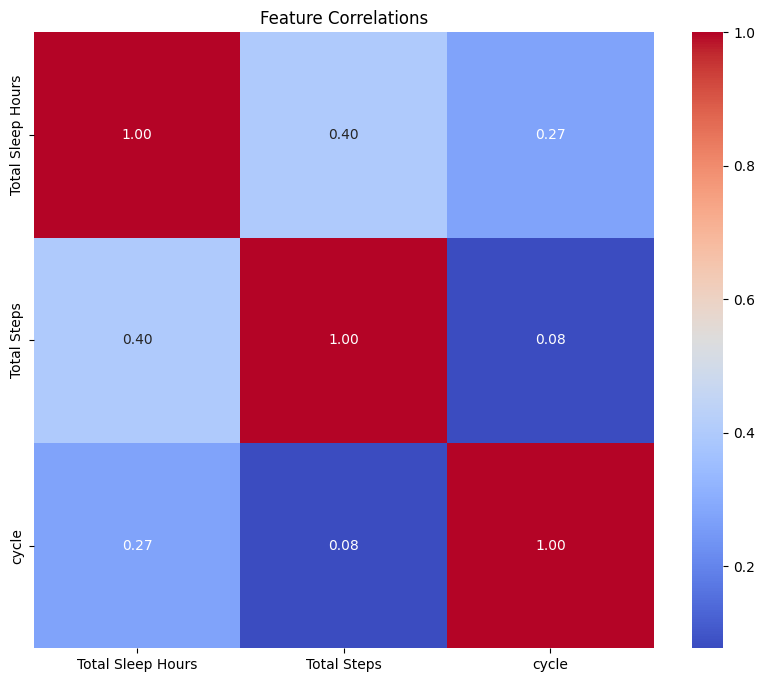

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns but exclude 'year' and 'month'
numeric_columns = monthly_summary.select_dtypes(include=[np.number]).columns
columns_to_include = numeric_columns.drop(['year', 'month'])  # Drop 'year' and 'month' columns

# Calculate correlations for selected columns only
correlation_matrix = monthly_summary[columns_to_include].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()



Scatterplot:

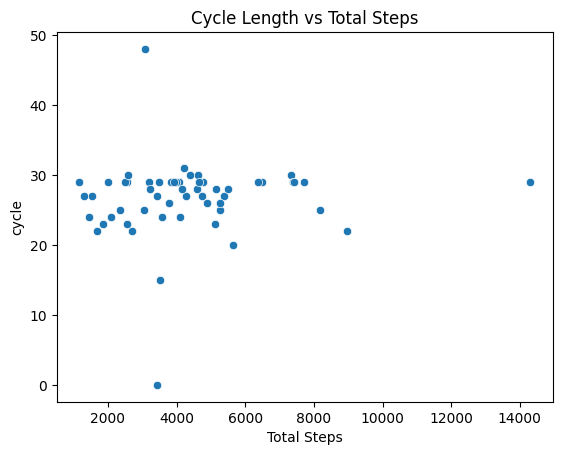

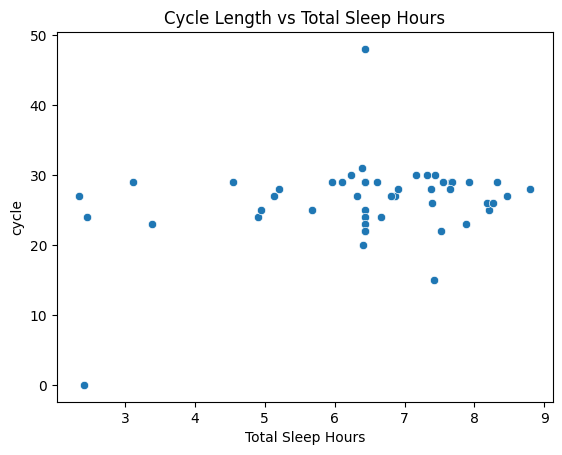

In [8]:
sns.scatterplot(data=monthly_summary, x='Total Steps', y='cycle')
plt.title('Cycle Length vs Total Steps')
plt.show()

sns.scatterplot(data=monthly_summary, x='Total Sleep Hours', y='cycle')
plt.title('Cycle Length vs Total Sleep Hours')
plt.show()


Pairplot:

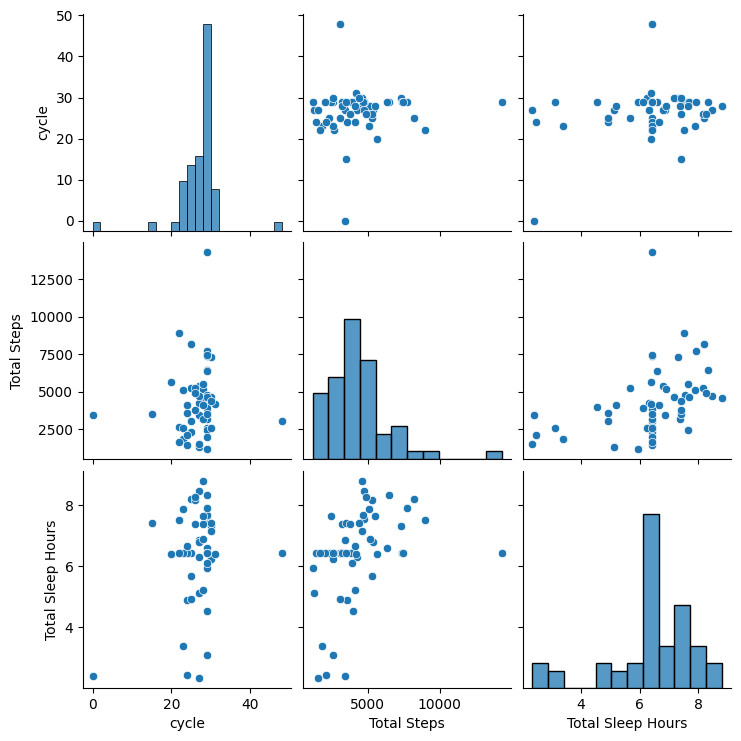

In [9]:

sns.pairplot(monthly_summary[['cycle', 'Total Steps', 'Total Sleep Hours']])
plt.show()


# Step 6: Tune Hyperparameter
- Used regression, classifer was inconclusive. My data includes continous numerical values.
- this part is for prediciton


In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = monthly_summary[['Total Sleep Hours', 'Total Steps']]
y = monthly_summary['cycle']  

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters and their possible values to tune for regression
param_grid = {
    'max_depth': [3, 5, 10, None],  # None means the nodes are expanded until all leaves are pure or contain less than min_samples_split samples.
    'min_samples_split': [2, 5, 10]
}

# Create the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object with cross-validation for regression
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')  # Use regression scoring

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
best_regressor = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters on your test data
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Test MSE with Best Hyperparameters:", mse)
print("Test R2 with Best Hyperparameters:", r2)


Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 10}
Test MSE with Best Hyperparameters: 4.104665205112959
Test R2 with Best Hyperparameters: -0.7033769150901044


# Step 7: Machine Learning

- Re-training the tree with the hyperparameters.

In [11]:


from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor with the chosen hyperparameters
dt_regressor_optimized = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42  # You can set the random state for reproducibility
)

# Fit the model on the training data
dt_regressor_optimized.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=42)

- Printing the trained tree

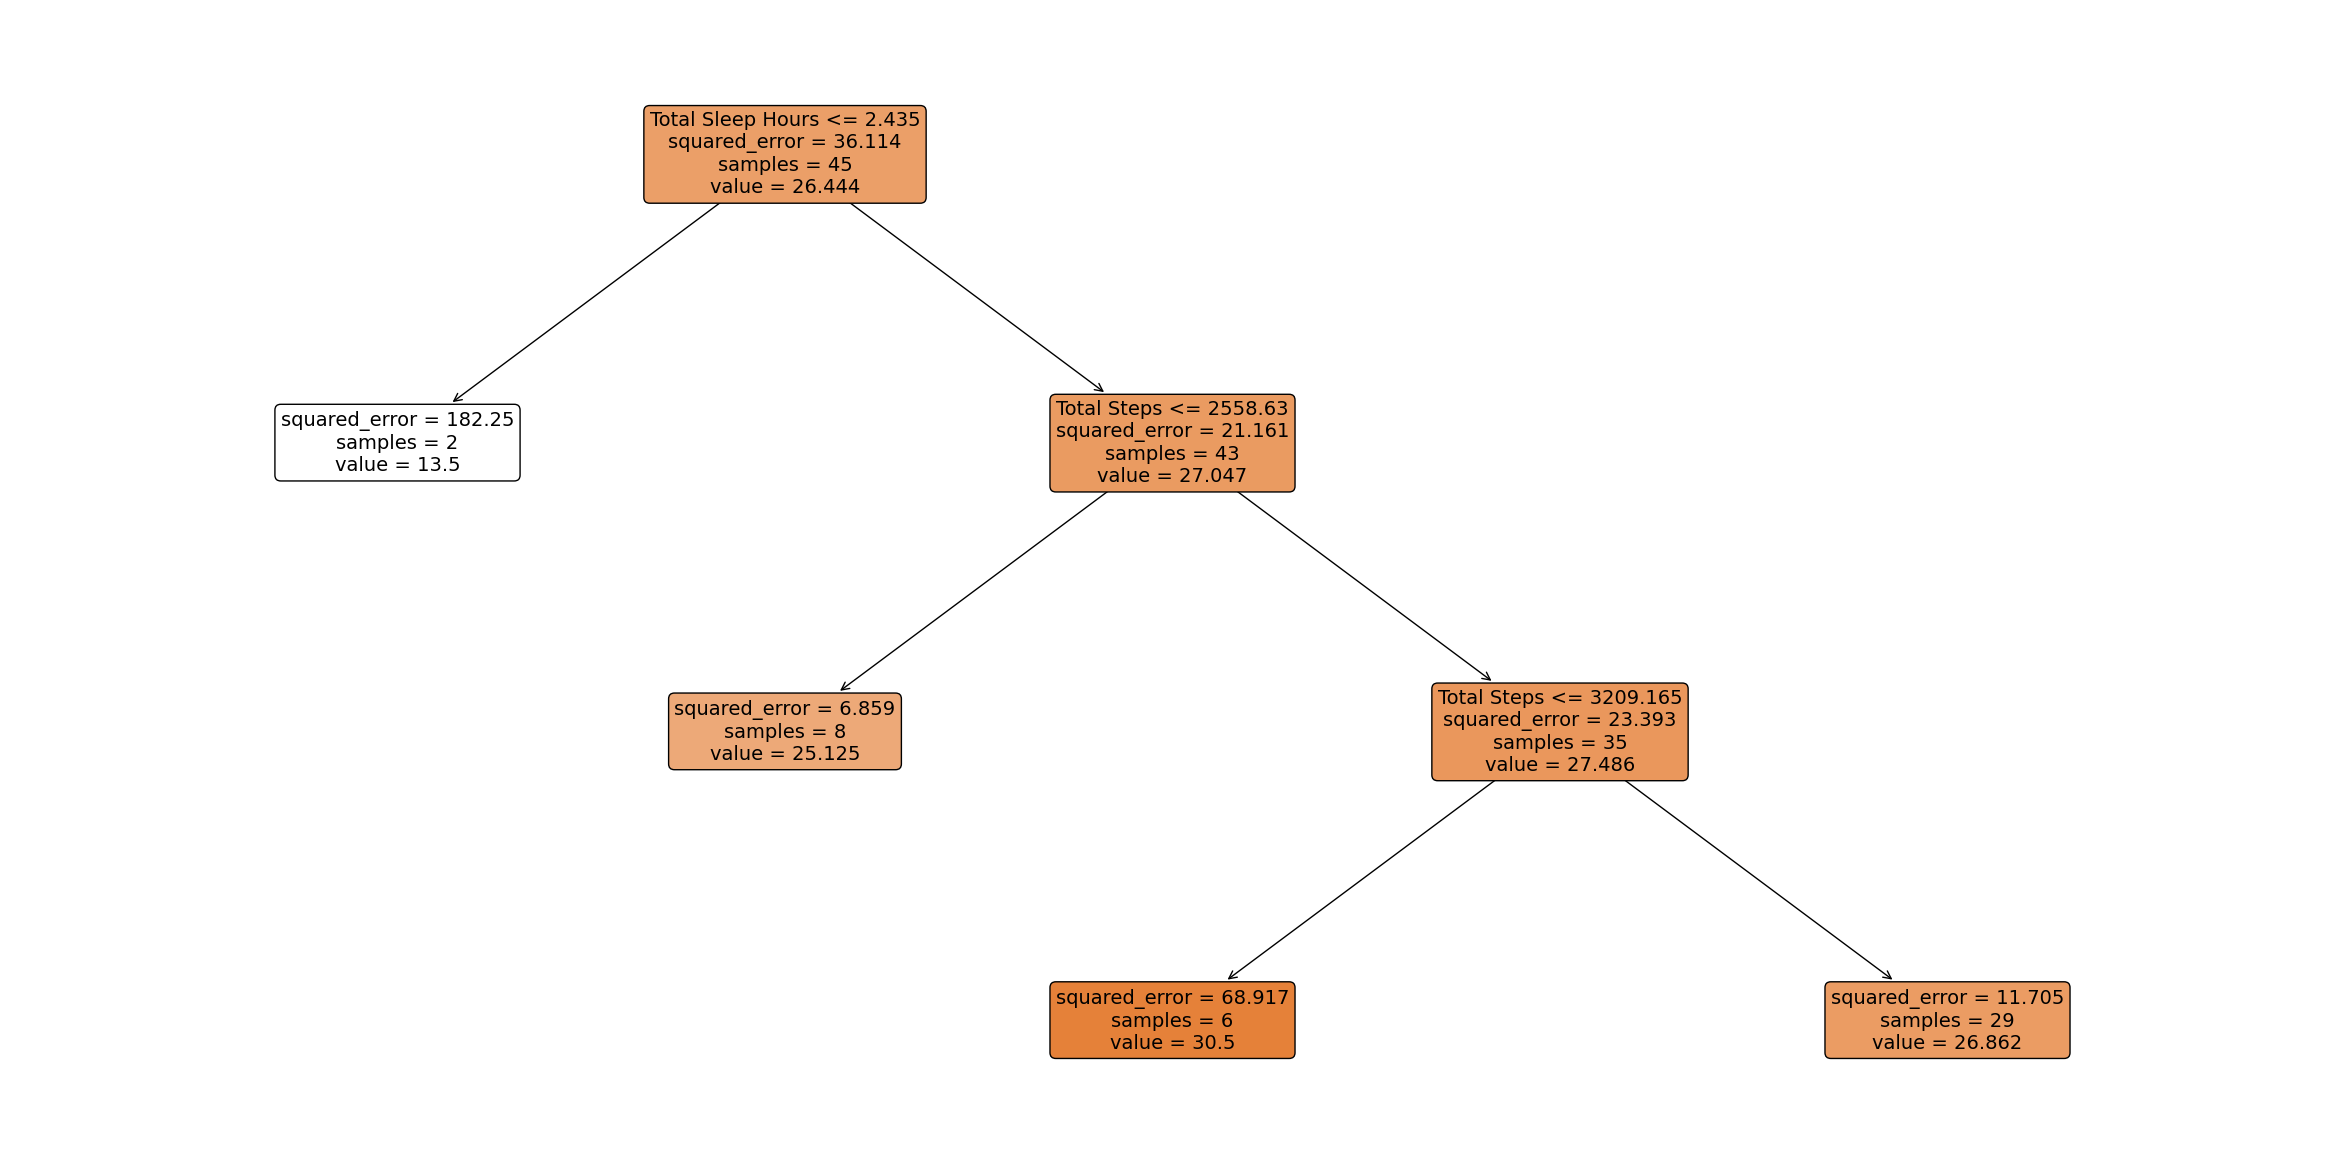

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(30,15))  # Set the figure size (width, height) as needed
feature_names = X_train.columns  # Feature names from your dataset

plot_tree(dt_regressor_optimized, 
          feature_names=feature_names, 
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.show()



# Step 8: Prediction

In [13]:
new_data = pd.DataFrame({'Total Sleep Hours': [7.5, 6.0, 8.0],
                         'Total Steps': [6000, 4500, 7500]})

# Make predictions on the new data
predictions = best_regressor.predict(new_data)

# Print the predicted values
print("Predicted 'cycle' values for the new data:")
print(predictions)


Predicted 'cycle' values for the new data:
[26.86206897 26.86206897 26.86206897]
